# Laboratorio 03

**Jhonatan Jurado Rodríguez**

1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|




2. Crear una función para calcular la función de coste.

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.



4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.






# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$


7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.



8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.


Hint:

Pueden comprobar la solución de la superficie con el siguiente cálculo:


\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}



Sea $\Theta^T = [\theta_0,\theta_1]$


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}

Luego:

\begin{equation}
\Lambda = \Theta^T X=
\begin{bmatrix}
(\theta_0 1 + \theta_1 x_1^1)\\
(\theta_0 1 + \theta_1 x_1^2)\\
.\\
.\\
.\\
(\theta_0 1 + \theta_1 x_1^m)\\
\end{bmatrix}
\end{equation}


Sumando sobre todos los elementos de matriz se puede encontrar la función de coste $J = \mathrm{\Lambda.mean()^2}$.

## **Desarrollo**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#1

m=6
x=np.array([i for i in range(m)])
y=np.array([i for i in range(m)])

df=pd.DataFrame({'Y':y, 'X_1':x})
df.index.name="Entrenamiento"
df

,Y,X_1
Entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


El theta1 que mínimiza la función de coste es 1.02


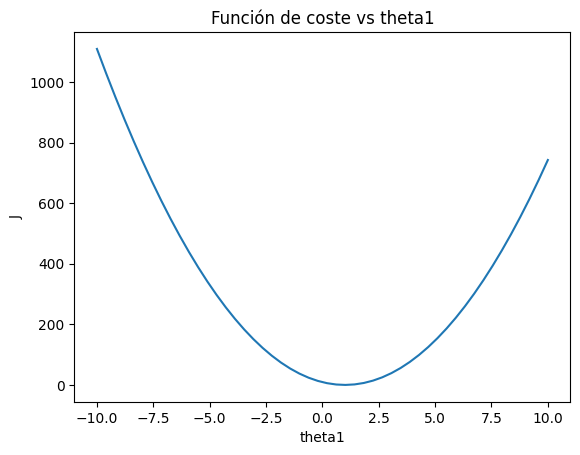

In [21]:
def H(theta,X):  #Función lineal
  h_=theta[0]+theta[1]*X
  return h_

#2
def coste(H,Y): #función de coste J (error cuadrático medio)
  J=np.mean((H-Y)**2)
  return J

#3
theta1=np.linspace(-10,10) #valores a probar para theta1

J_list=[] #en esta lista se almacenará el valor de J(funcion de coste) para cada valor de

for i in theta1:
  h=H([0,i],df.X_1)
  J=coste(h,df.Y)
  J_list.append(J)

theta1_min=theta1[J_list.index(min(J_list))]

print(f"El theta1 que mínimiza la función de coste es {theta1_min:.2f}")

plt.plot(theta1,J_list)
plt.xlabel("theta1")
plt.ylabel("J")
plt.title("Función de coste vs theta1")
plt.show()

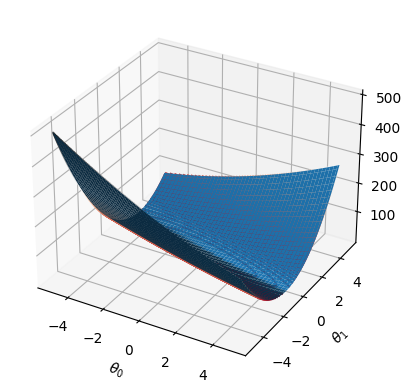

-5.0
-5.0
0.007312179029350728


In [7]:
#4

theta1=np.linspace(-5,5,100) #valores a probar para theta1
theta0=np.linspace(-5,5,100) #valores a probar para theta0

t0, t1 = np.meshgrid(theta0, theta1)
J=np.zeros(t0.shape)

for i in range(t0.shape[0]):
  for j in range(t0.shape[1]):
    h=H([t0[i,j],t1[i,j]],df.X_1)
    J[i,j]=coste(h,df.Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200, cmap='RdGy',  linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

print(t0.min())
print(t1.min())
print(J.min())

# Encuentra el índice del mínimo en la matriz aplanada
indice_minimo_aplanado = J.argmin()

# Convierte el índice a coordenadas en la matriz original
indice_minimo = np.unravel_index(indice_minimo_aplanado, J.shape)

#print(indice_minimo)
#print(t0[indice_minimo])
#print(t1[indice_minimo])

In [8]:
#6

f= lambda x: (x-4)**2
fp= lambda x: 2*(x-4)

def gradD(x_, alpha, fp):
  """
  Gradiente descendente
  """
  return x_ - alpha*fp(x_)

#Determinación del gradiente descendente
xi=2
alpha=0.7
X = []

def gradient_iteration(alpha, xi):
  X = []
  for i in range(0,20):
    x=gradD(xi, alpha, fp)
    xi=x
    X.append(xi)
    if(abs(fp(xi))<1E-4):
      print(f"El valor mínimo de la función está en x={xi:.4f} después de {i} iteraciones")
      break
  return X


gradient_iteration(alpha, xi)


El valor mínimo de la función está en x=4.0000 después de 11 iteraciones


[4.8,
 3.68,
 4.128,
 3.9488,
 4.02048,
 3.991808,
 4.0032768,
 3.99868928,
 4.000524288,
 3.9997902848,
 4.00008388608,
 3.999966445568]

Los valores theta donde existe un mínimo para f son: [-1.2606799 -1.7397282]
El valor mínimo de la función para dichos valores theta es -0.01300922342452478


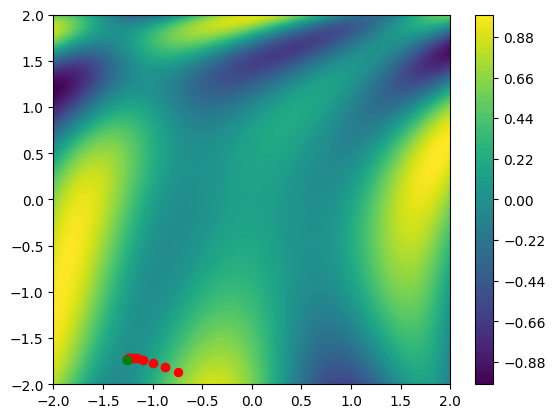

In [14]:
#7

import scipy as sc

func = lambda th: np.sin(1 / 2 * th[0] ** 2 - 1 / 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])

res = 100

_X = np.linspace(-2, 2, res)
_Y = np.linspace(-2, 2, res)
_Z = np.zeros((res, res))

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x, y])

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()

Theta = np.random.rand(2) * 4 - 2
_T = np.copy(Theta)

h = 0.001
lr = 0.001

plt.plot(Theta[0], Theta[1], "o", c="white")

grad = np.zeros(2)

for _ in range(1000):
    for it, th in enumerate(Theta):
        _T = np.copy(Theta)
        _T[it] = _T[it] + h
        deriv = (func(_T) - func(Theta)) / h
        grad[it] = deriv

    Theta = Theta - lr * grad

    if ( _ % 100 == 0 ):
      plt.plot(Theta[0], Theta[1], "o", c="red")
    #print(func(Theta))

print("Los valores theta donde existe un mínimo para f son:", Theta)
print("El valor mínimo de la función para dichos valores theta es",func(Theta))
plt.plot(Theta[0], Theta[1], "o", c="green")
plt.show()


Valores  de theta optimizados: [0.21125624 0.19773624]


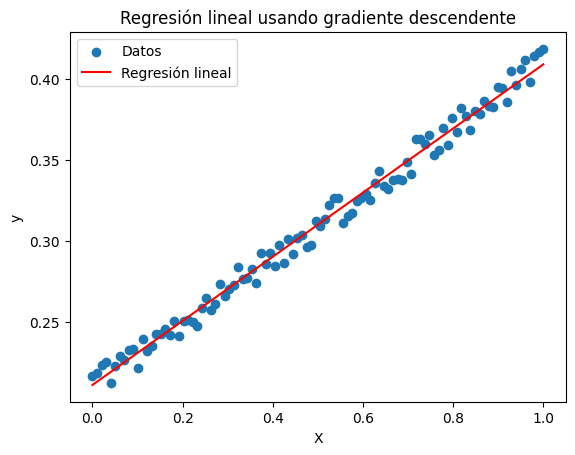

In [19]:
#8

#Escribimos nustros datos
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

# Función H (lineal)
def H(theta, X):
    return theta[0] + theta[1] * X

# Nuestra función de coste (mínimos cuadrados)
def coste(H, Y):
    return np.mean((H - Y)**2)

# Gradiente descendente
def gradD(theta, alpha, X, y):
    h = H(theta, X)
    theta[0] = theta[0] - alpha * np.mean(h - y)
    theta[1] = theta[1] - alpha * np.mean((h - y) * X)
    return theta

theta = np.random.rand(2) * 2 - 1
alpha = 0.1  # Learning rate
iterations = 1000

# Ejecutamos gradiente descendente
for _ in range(iterations):
    theta = gradD(theta, alpha, X, y)

# Valores optimizados
print("Valores  de theta optimizados:", theta)

#Graficamos la regresión
plt.scatter(X, y, label="Datos")
plt.plot(X, H(theta, X), color='red', label="Regresión lineal")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regresión lineal usando gradiente descendente")
plt.show()

Intersección: 0.2108736911197352
Coeficiente: 0.19845003508308087


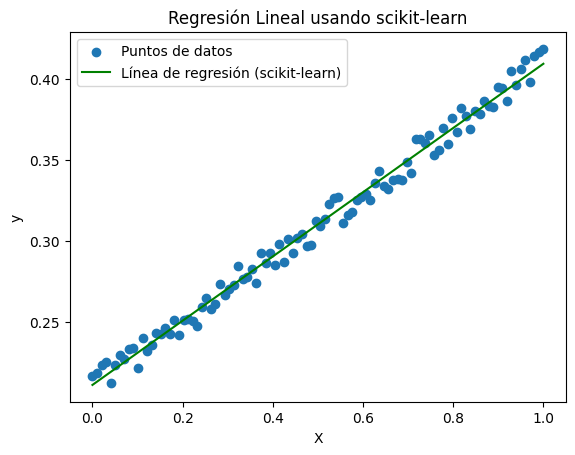

In [20]:
#9

from sklearn.linear_model import LinearRegression

# Redimensionar X a una matriz 2D como lo requiere scikit-learn
X = X.reshape(-1, 1)

# Crear y ajustar el modelo LinearRegression
modelo = LinearRegression()
modelo.fit(X, y)

# Imprimir los coeficientes
print("Intersección:", modelo.intercept_)
print("Coeficiente:", modelo.coef_[0])

# Graficar la línea de regresión de scikit-learn
plt.scatter(X, y, label="Puntos de datos")
plt.plot(X, modelo.predict(X), color='green', label="Línea de regresión (scikit-learn)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal usando scikit-learn")
plt.show()